In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

C:\Users\UJJWAL TOMAR\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('bike_rent.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


In [3]:
df.shape

(17379, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


In [5]:
df.describe()

,instant,hr,weekday,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,3.003683,189.463088
std,5017.0295,6.914405,2.005771,181.387599
min,1.0000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,1.000000,40.000000
50%,8690.0000,12.000000,3.000000,142.000000
75%,13034.5000,18.000000,5.000000,281.000000
max,17379.0000,23.000000,6.000000,977.000000


##**STEP 5: Identifying the Question Mark (?) in the Dataset**

In [6]:
# STEP 5: Identifying the Question Mark (?) in the Dataset

# How did we identify ? existed?

#Step 1: Check unique values in object-type columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].unique())

dteday ['01-01-2011' '02-01-2011' '03-01-2011' '04-01-2011' '05-01-2011'
 '06-01-2011' '07-01-2011' '08-01-2011' '09-01-2011' '10-01-2011'
 '11-01-2011' '12-01-2011' '13-01-2011' '14-01-2011' '15-01-2011'
 '16-01-2011' '17-01-2011' '18-01-2011' '19-01-2011' '20-01-2011'
 '21-01-2011' '22-01-2011' '23-01-2011' '24-01-2011' '25-01-2011'
 '26-01-2011' '27-01-2011' '28-01-2011' '29-01-2011' '30-01-2011'
 '31-01-2011' '01-02-2011' '02-02-2011' '03-02-2011' '04-02-2011'
 '05-02-2011' '06-02-2011' '07-02-2011' '08-02-2011' '09-02-2011'
 '10-02-2011' '11-02-2011' '12-02-2011' '13-02-2011' '14-02-2011'
 '15-02-2011' '16-02-2011' '17-02-2011' '18-02-2011' '19-02-2011'
 '20-02-2011' '21-02-2011' '22-02-2011' '23-02-2011' '24-02-2011'
 '25-02-2011' '26-02-2011' '27-02-2011' '28-02-2011' '01-03-2011'
 '02-03-2011' '03-03-2011' '04-03-2011' '05-03-2011' '06-03-2011'
 '07-03-2011' '08-03-2011' '09-03-2011' '10-03-2011' '11-03-2011'
 '12-03-2011' '13-03-2011' '14-03-2011' '15-03-2011' '16-03-2011'
 '1

In [7]:
# Step-6 :  Handling Missing Values : Replace ? with NaN

df.replace('?', np.nan, inplace=True)

In [8]:
'''Convert Columns to Numeric
WHY? : Some numeric columns are read as object because of ?.'''

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

C:\Users\UJJWAL TOMAR\AppData\Local\Temp\ipykernel_282292\3803735782.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [9]:
'''Check Missing Values Count
WHY? : To confirm which columns need imputation.'''

df.isnull().sum()

instant        0
dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64

In [10]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [11]:
'''MEDIAN IMPUTATION FOR NUMERICAL COLUMNS
WHY median?
- Robust to outliers
- Suitable for skewed demand data'''

for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\UJJWAL TOMAR\AppData\Local\Temp\ipykernel_282292\3584862104.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\UJJWAL TOMAR\AppData\Local\Temp\ipykernel_282292\3584862104.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [12]:
'''MODE IMPUTATION FOR CATEGORICAL COLUMNS
WHY mode?
- Categorical data has no median
- Mode preserves most frequent category'''

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\UJJWAL TOMAR\AppData\Local\Temp\ipykernel_282292\75568042.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [13]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
# STEP 7: Data Cleaning
# 7.1 Remove Irrelevant Columns

df.drop(['instant', 'dteday'], axis=1, inplace=True)

''' WHY? : Some columns do not add predictive value.
- instant → Index-like
- dteday → Already captured via month, year, weekday'''

' WHY? : Some columns do not add predictive value.\n- instant → Index-like\n- dteday → Already captured via month, year, weekday'

In [15]:
# 7.2 Remove Data Leakage Columns
'''WHY?
casual + registered = cnt
Keeping them will artificially inflate accuracy'''

df.drop(['casual', 'registered'], axis=1, inplace=True)

#**Exploratory Data Analysis**

In [16]:
# Step-1 : Separate Target & Features

target = 'cnt'

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


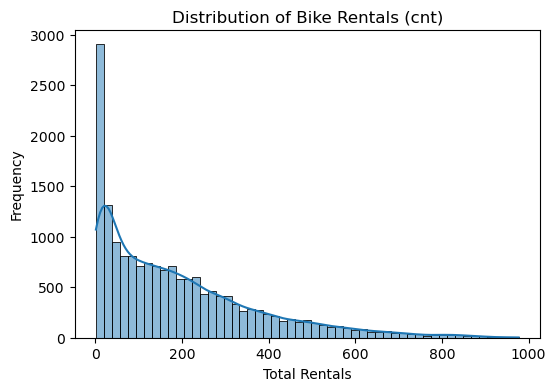

In [17]:
# Step-2 :  Distribution of Target Variable

plt.figure(figsize=(6,4))
sns.histplot(df[target], kde=True)
plt.title("Distribution of Bike Rentals (cnt)")
plt.xlabel("Total Rentals")
plt.ylabel("Frequency")
plt.show()

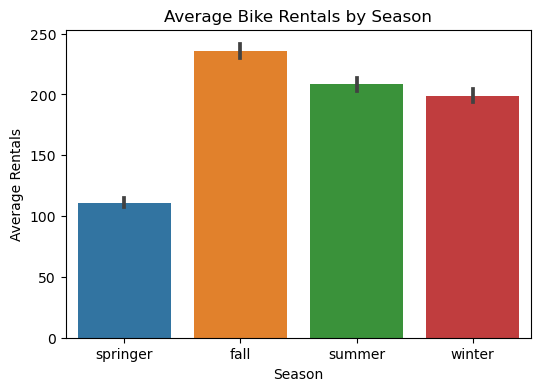

In [18]:
# Step-3 : Categorical Variables vs Target

# 3.1 Season vs Rentals
plt.figure(figsize=(6,4))
sns.barplot(x='season', y='cnt', data=df)
plt.title("Average Bike Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.show()

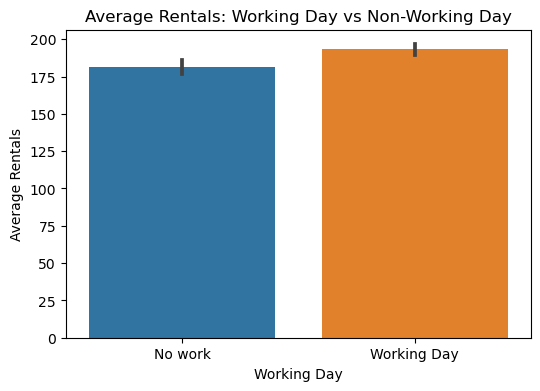

In [19]:
# 3.2 Working Day vs Rentals
plt.figure(figsize=(6,4))
sns.barplot(x='workingday', y='cnt', data=df)
plt.title("Average Rentals: Working Day vs Non-Working Day")
plt.xlabel("Working Day")
plt.ylabel("Average Rentals")
plt.show()

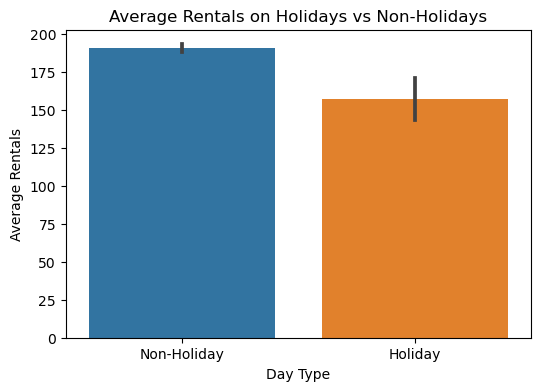

In [20]:
# 3.3 Holiday vs Rentals
plt.figure(figsize=(6,4))
ax = sns.barplot(x='holiday', y='cnt', data=df)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Holiday', 'Holiday'])
plt.title("Average Rentals on Holidays vs Non-Holidays")
plt.xlabel("Day Type")
plt.ylabel("Average Rentals")
plt.show()

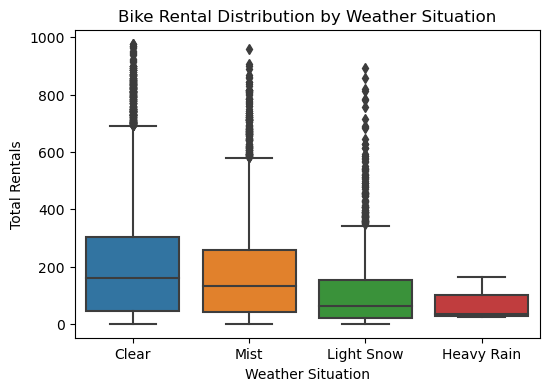

In [21]:
# 3.4 Weather Situation vs Rentals (Boxplot)

plt.figure(figsize=(6,4))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title("Bike Rental Distribution by Weather Situation")
plt.xlabel("Weather Situation")
plt.ylabel("Total Rentals")
plt.show()

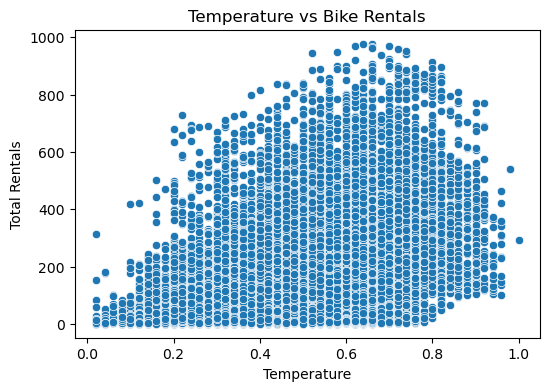

In [22]:
# STEP 4: Numerical Variables vs Target

# 4.1 Temperature vs Rentals
plt.figure(figsize=(6,4))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title("Temperature vs Bike Rentals")
plt.xlabel("Temperature")
plt.ylabel("Total Rentals")
plt.show()

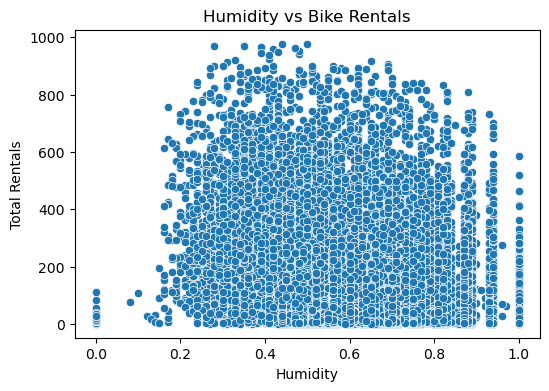

In [23]:
# 4.2 Humidity vs Rentals
plt.figure(figsize=(6,4))
sns.scatterplot(x='hum', y='cnt', data=df)
plt.title("Humidity vs Bike Rentals")
plt.xlabel("Humidity")
plt.ylabel("Total Rentals")
plt.show()

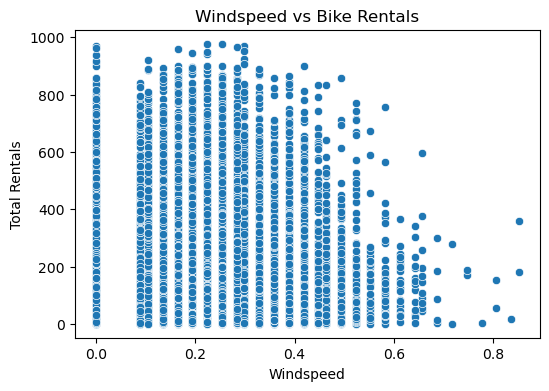

In [24]:
# 4.3 Windspeed vs Rentals
plt.figure(figsize=(6,4))
sns.scatterplot(x='windspeed', y='cnt', data=df)
plt.title("Windspeed vs Bike Rentals")
plt.xlabel("Windspeed")
plt.ylabel("Total Rentals")
plt.show()

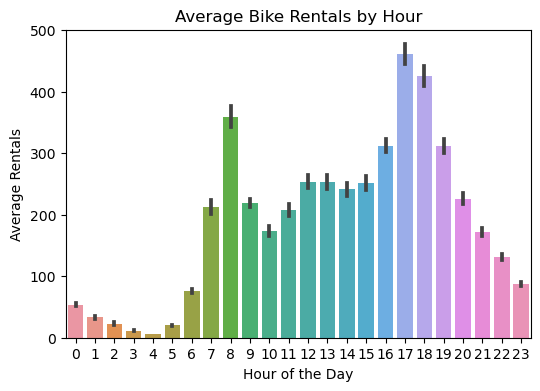

In [25]:
# STEP 5: Time-Based Analysis

# 5.1 Hour vs Rentals
plt.figure(figsize=(6,4))
sns.barplot(x='hr', y='cnt', data=df)
plt.title("Average Bike Rentals by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Rentals")
plt.show()

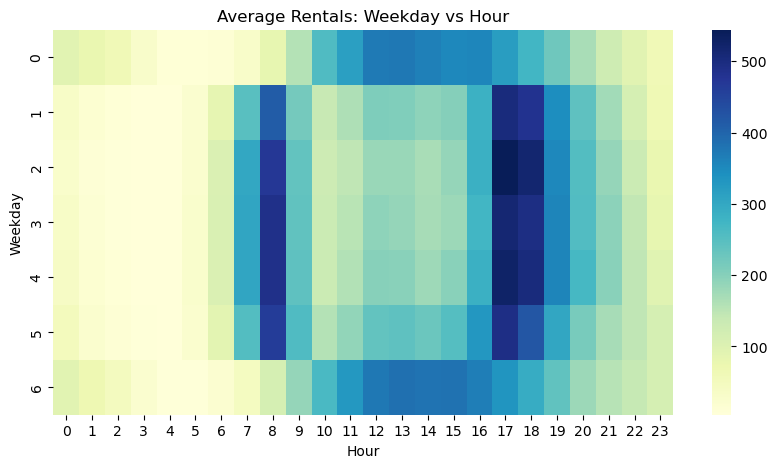

In [26]:
# 5.2 Weekday vs Hour (Heatmap)
heatmap_data = df.pivot_table(
    values='cnt',
    index='weekday',
    columns='hr',
    aggfunc='mean'
)

plt.figure(figsize=(10,5))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Average Rentals: Weekday vs Hour")
plt.xlabel("Hour")
plt.ylabel("Weekday")
plt.show()

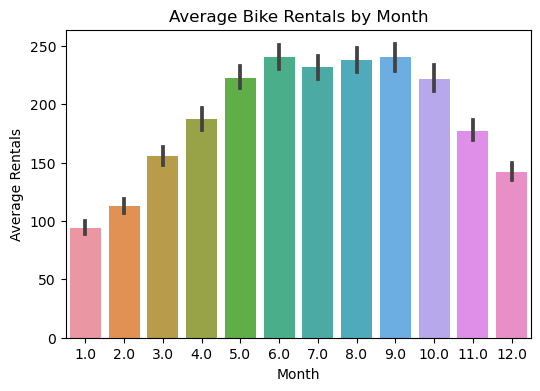

In [27]:
# STEP 6: Monthly Seasonality
plt.figure(figsize=(6,4))
sns.barplot(x='mnth', y='cnt', data=df)
plt.title("Average Bike Rentals by Month")
plt.xlabel("Month")
plt.ylabel("Average Rentals")
plt.show()


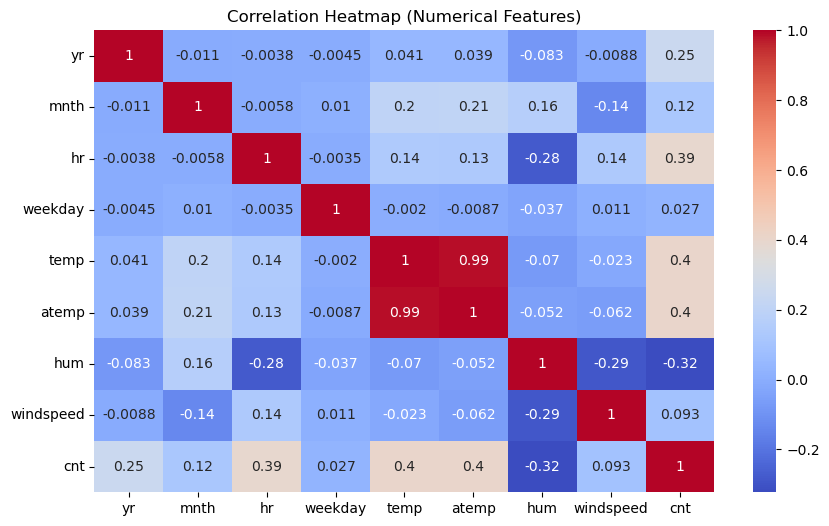

In [28]:
# STEP 7: Correlation Analysis (Numeric Only)

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

#**Feature Engineering**

In [29]:
# Step-1 : Drop Highly Correlated Features

# Check correlation between temp and atemp
df[['temp', 'atemp']].corr()

,temp,atemp
temp,1.00000,0.98701
atemp,0.98701,1.00000


In [30]:
df.drop('atemp', axis=1, inplace=True)

In [31]:
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#**Feature Selection**

In [32]:
# Correlation with Target (Numerical Only)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_with_target = numeric_df.corr()['cnt'].sort_values(ascending=False)
corr_with_target

cnt          1.000000
temp         0.404482
hr           0.394071
yr           0.250454
mnth         0.120658
windspeed    0.093320
weekday      0.026900
hum         -0.322823
Name: cnt, dtype: float64

In [33]:
''' Final Feature Decision :

Based on:
- EDA insights
- Correlation values
- Domain logic

Keep:

temp
hr
season
workingday
weathersit
mnth
yr
hum
windspeed
weekday

Already removed:

casual, registered (leakage)
instant, dteday (irrelevant)
atemp (multicollinearity)'''

' Final Feature Decision :\n\nBased on:\n- EDA insights\n- Correlation values\n- Domain logic\n\nKeep:\n\ntemp\nhr\nseason\nworkingday\nweathersit\nmnth\nyr\nhum\nwindspeed\nweekday\n\nAlready removed:\n\ncasual, registered (leakage)\ninstant, dteday (irrelevant)\natemp (multicollinearity)'

#**Label Encoding**

In [34]:
# Identify categorical columns before modeling
df.select_dtypes(include='object').columns

Index(['season', 'holiday', 'workingday', 'weathersit'], dtype='object')

In [35]:
# CONVERT BINARY CATEGORICAL COLUMNS
# WHY? : Binary categories must be converted to numeric form.

binary_map = {
    'No': 0,
    'Yes': 1,
    'Non-Holiday': 0,
    'Holiday': 1
}

df.replace(binary_map, inplace=True)

C:\Users\UJJWAL TOMAR\AppData\Local\Temp\ipykernel_282292\3608090147.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(binary_map, inplace=True)


In [36]:
# LABEL ENCODE REMAINING CATEGORICAL COLUMNS

from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [37]:
df.dtypes

season          int32
yr            float64
mnth          float64
hr              int64
holiday         int64
weekday         int64
workingday      int32
weathersit      int32
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [38]:
X = df.drop('cnt', axis=1)
y = df['cnt']

In [39]:
# TRAIN–TEST SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [40]:
# FEATURE SCALING

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
# MODEL BUILDING – LINEAR REGRESSION (BASELINE)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
# PREDICTIONS
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [43]:
# MODEL EVALUATION METRICS

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Testing metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Training R²:", train_r2)
print("Testing R²:", test_r2)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training R²: 0.3949539028419281
Testing R²: 0.394806923331784
Training RMSE: 141.7345936875308
Testing RMSE: 138.43297190581026


In [44]:
print("R² Difference:", train_r2 - test_r2)

R² Difference: 0.00014697951014408517


In [45]:
# FEATURE IMPORTANCE (LINEAR MODEL)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

feature_importance

,Feature,Coefficient
8,temp,68.554767
3,hr,51.033605
1,yr,40.711683
0,season,23.818382
2,mnth,8.599377
5,weekday,3.473204
7,weathersit,2.205517
6,workingday,1.219948
10,windspeed,1.066562
4,holiday,-4.684523


In [46]:
# IMPROVING ACCURACY – RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=15
)

rf.fit(X_train, y_train)

y_test_pred_rf = rf.predict(X_test)


In [47]:
# RANDOM FOREST EVALUATION

rf_r2 = r2_score(y_test, y_test_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print("Random Forest R²:", rf_r2)
print("Random Forest RMSE:", rf_rmse)

Random Forest R²: 0.94023709691014
Random Forest RMSE: 43.50191845196274


In [48]:
# RANDOM FOREST FEATURE IMPORTANCE
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

rf_importance

,Feature,Importance
3,hr,0.618415
8,temp,0.135191
1,yr,0.081369
6,workingday,0.056527
9,hum,0.034189
0,season,0.020793
2,mnth,0.019010
5,weekday,0.012811
10,windspeed,0.011454
7,weathersit,0.007583


In [49]:
# GRADIENT BOOSTING

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gbr.fit(X_train, y_train)

y_test_pred_gbr = gbr.predict(X_test)

gbr_r2 = r2_score(y_test, y_test_pred_gbr)
gbr_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_gbr))

print("Gradient Boosting R²:", gbr_r2)
print("Gradient Boosting RMSE:", gbr_rmse)

Gradient Boosting R²: 0.8741070515594955
Gradient Boosting RMSE: 63.13835598689526


In [50]:
# FINAL MODEL COMPARISON
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'R2 Score': [test_r2, rf_r2, gbr_r2],
    'RMSE': [test_rmse, rf_rmse, gbr_rmse]
})

model_comparison

,Model,R2 Score,RMSE
0,Linear Regression,0.394807,138.432972
1,Random Forest,0.940237,43.501918
2,Gradient Boosting,0.874107,63.138356


#**Saving the model**

In [51]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# Train model again (optimized)
rf_final = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf_final.fit(X_train, y_train)

# Save model using joblib
joblib.dump(rf_final, "bike_model.joblib")

# Save scaler using joblib
joblib.dump(scaler, "scaler.joblib")

print("Model and scaler saved using joblib")


Model and scaler saved using joblib


In [52]:
#loading and testing

In [54]:
X_test

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
12830,0,2012.0,6.0,19,0,6,0,0,0.80,0.27,0.1940
8688,1,2012.0,1.0,20,1,1,0,0,0.24,0.41,0.2239
7091,3,2011.0,10.0,2,0,5,1,0,0.32,0.66,0.2836
12230,2,2012.0,5.0,19,0,2,1,0,0.78,0.52,0.3582
431,1,2011.0,1.0,0,0,4,1,0,0.26,0.56,0.3881
...,...,...,...,...,...,...,...,...,...,...,...
6759,3,2011.0,10.0,5,0,5,1,3,0.56,0.94,0.1642
13989,0,2012.0,8.0,2,0,6,0,2,0.64,0.78,0.1940
173,1,2011.0,1.0,12,0,6,0,3,0.20,0.59,0.3582
16192,3,2012.0,11.0,10,1,1,0,0,0.48,0.77,0.1642
